In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_excel('historical.xlsx')
df

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,...,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,Complain,CostContact,Revenue,DepVar
0,30651,Mr. Trevor Ferguson,1987,Graduation,Married,46575,0,0,2022-02-20 00:00:00,71.0,...,7,0,0,0,0,0,0,3,16,0
1,6222,Mr. Peter Gray,1973,PhD,Together,48852,1,0,2022-01-13 00:00:00,34.0,...,8,0,0,0,0,0,0,3,16,0
2,3909,Mrs. Theresa Wallace,1961,Graduation,Married,91345,0,1,2021-04-21 00:00:00,75.0,...,6,0,0,0,0,0,0,3,16,0
3,20121,Miss Lillian Alsop,1977,Graduation,Together,102522,0,1,2021-05-30 00:00:00,95.0,...,5,0,0,0,0,0,0,3,16,0
4,19896,Miss Lillian Dowd,1961,Master,Together,38770,0,0,2020-11-19 00:00:00,46.0,...,9,0,0,0,0,0,0,3,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,13344,Mr. Justin Metcalfe,1967,Graduation,Widow,89377,0,0,2021-09-26 00:00:00,11.0,...,3,0,0,0,0,0,0,3,16,0
2514,28152,Mr. Brandon Nash,1968,Master,Married,95486,0,1,2021-11-15 00:00:00,4.0,...,7,0,0,0,0,0,0,3,16,1
2515,31938,Mr. Simon Mills,1970,Graduation,Single,28620,1,1,2022-01-27 00:00:00,47.0,...,8,1,0,0,0,0,0,3,16,1
2516,20016,Mr. Brandon Poole,1966,Graduation,Married,59998,1,1,2020-08-11 00:00:00,26.0,...,9,0,0,0,0,0,0,3,16,1


In [3]:
df.set_index('CustomerID', inplace = True)
df

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,Complain,CostContact,Revenue,DepVar
CustomerID,,,,,,,,,,,,,,,,,,,,,
30651,Mr. Trevor Ferguson,1987,Graduation,Married,46575,0,0,2022-02-20 00:00:00,71.0,30,...,7,0,0,0,0,0,0,3,16,0
6222,Mr. Peter Gray,1973,PhD,Together,48852,1,0,2022-01-13 00:00:00,34.0,130,...,8,0,0,0,0,0,0,3,16,0
3909,Mrs. Theresa Wallace,1961,Graduation,Married,91345,0,1,2021-04-21 00:00:00,75.0,4160,...,6,0,0,0,0,0,0,3,16,0
20121,Miss Lillian Alsop,1977,Graduation,Together,102522,0,1,2021-05-30 00:00:00,95.0,3120,...,5,0,0,0,0,0,0,3,16,0
19896,Miss Lillian Dowd,1961,Master,Together,38770,0,0,2020-11-19 00:00:00,46.0,30,...,9,0,0,0,0,0,0,3,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,Mr. Justin Metcalfe,1967,Graduation,Widow,89377,0,0,2021-09-26 00:00:00,11.0,2530,...,3,0,0,0,0,0,0,3,16,0
28152,Mr. Brandon Nash,1968,Master,Married,95486,0,1,2021-11-15 00:00:00,4.0,7380,...,7,0,0,0,0,0,0,3,16,1
31938,Mr. Simon Mills,1970,Graduation,Single,28620,1,1,2022-01-27 00:00:00,47.0,140,...,8,1,0,0,0,0,0,3,16,1


In [4]:
df[df.duplicated()]

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,Complain,CostContact,Revenue,DepVar
CustomerID,,,,,,,,,,,,,,,,,,,,,
17292,Mr. Adam Blake,1992,HighSchool,Single,55497,1,0,2021-07-11 00:00:00,20.0,410,...,8,0,0,0,0,0,0,3,16,0
9183,Mr. Liam Cornish,1981,Graduation,Divorced,24242,1,0,2022-03-01 00:00:00,23.0,30,...,6,0,0,0,0,0,0,3,16,0
10608,Mrs. Kylie Walker,1976,PhD,Married,33080,1,1,2020-11-04 00:00:00,38.0,270,...,5,0,0,0,0,0,0,3,16,0
26031,Mr. Blake Taylor,1974,PhD,Together,104976,0,0,2020-11-08 00:00:00,12.0,9620,...,5,0,0,0,1,0,0,3,16,1
7518,Mrs. Amanda King,1963,Graduation,Married,85942,1,1,2020-11-21 00:00:00,20.0,4900,...,7,0,0,0,0,0,0,3,16,1
17031,Mr. Dominic Mills,1991,Master,Married,54806,1,0,2021-12-17 00:00:00,4.0,30,...,6,1,0,0,0,0,0,3,16,1
27696,Miss Vanessa McLean,1968,Graduation,Together,46004,1,1,2020-08-23 00:00:00,30.0,100,...,7,0,0,0,0,0,0,3,16,0
22770,Mr. David Thomson,1984,Master,Married,106335,0,0,2021-04-28 00:00:00,97.0,8030,...,1,0,0,0,0,0,0,3,16,0
10809,Mr. Justin Miller,1966,Master,Together,35973,0,1,2022-01-12 00:00:00,90.0,410,...,6,1,0,0,0,0,0,3,16,0


In [5]:
df.drop_duplicates(inplace = True)
df

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,Complain,CostContact,Revenue,DepVar
CustomerID,,,,,,,,,,,,,,,,,,,,,
30651,Mr. Trevor Ferguson,1987,Graduation,Married,46575,0,0,2022-02-20 00:00:00,71.0,30,...,7,0,0,0,0,0,0,3,16,0
6222,Mr. Peter Gray,1973,PhD,Together,48852,1,0,2022-01-13 00:00:00,34.0,130,...,8,0,0,0,0,0,0,3,16,0
3909,Mrs. Theresa Wallace,1961,Graduation,Married,91345,0,1,2021-04-21 00:00:00,75.0,4160,...,6,0,0,0,0,0,0,3,16,0
20121,Miss Lillian Alsop,1977,Graduation,Together,102522,0,1,2021-05-30 00:00:00,95.0,3120,...,5,0,0,0,0,0,0,3,16,0
19896,Miss Lillian Dowd,1961,Master,Together,38770,0,0,2020-11-19 00:00:00,46.0,30,...,9,0,0,0,0,0,0,3,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,Mr. Justin Metcalfe,1967,Graduation,Widow,89377,0,0,2021-09-26 00:00:00,11.0,2530,...,3,0,0,0,0,0,0,3,16,0
28152,Mr. Brandon Nash,1968,Master,Married,95486,0,1,2021-11-15 00:00:00,4.0,7380,...,7,0,0,0,0,0,0,3,16,1
31938,Mr. Simon Mills,1970,Graduation,Single,28620,1,1,2022-01-27 00:00:00,47.0,140,...,8,1,0,0,0,0,0,3,16,1


In [6]:
df.columns

Index(['Name', 'Birthyear', 'Education', 'Marital_Status', 'Income',
       'Kid_Younger6', 'Children_6to18', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4',
       'Response_Cmp5', 'Response_Cmp1', 'Complain', 'CostContact', 'Revenue',
       'DepVar'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 30651 to 15492
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2500 non-null   object 
 1   Birthyear              2500 non-null   int64  
 2   Education              2468 non-null   object 
 3   Marital_Status         2500 non-null   object 
 4   Income                 2500 non-null   int64  
 5   Kid_Younger6           2500 non-null   int64  
 6   Children_6to18         2500 non-null   int64  
 7   Date_Adherence         2500 non-null   object 
 8   Recency                2452 non-null   float64
 9   MntMeat&Fish           2500 non-null   int64  
 10  MntEntries             2500 non-null   int64  
 11  MntVegan&Vegetarian    2500 non-null   int64  
 12  MntDrinks              2479 non-null   float64
 13  MntDesserts            2500 non-null   int64  
 14  MntAdditionalRequests  2500 non-null   int64  
 15 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birthyear,2500.0,1976.620800,11.897631,1948.0,1967.0,1978.0,1985.00,2005.0
Income,2500.0,77557.227600,35505.417110,2678.0,50998.0,76684.5,101712.00,237117.0
Kid_Younger6,2500.0,0.439200,0.543343,0.0,0.0,0.0,1.00,2.0
Children_6to18,2500.0,0.500800,0.544535,0.0,0.0,0.0,1.00,2.0
Recency,2452.0,48.983279,28.636798,0.0,25.0,48.0,73.00,99.0
MntMeat&Fish,2500.0,3071.254400,3376.433081,0.0,240.0,1795.0,5050.00,14980.0
MntEntries,2500.0,526.582400,761.351600,0.0,40.0,180.0,680.00,3980.0
MntVegan&Vegetarian,2500.0,2748.278800,3875.425530,5.0,225.0,1110.0,3693.75,24886.0
MntDrinks,2479.0,545.916499,793.028804,0.0,40.0,180.0,700.00,3960.0
MntDesserts,2500.0,524.163200,763.868740,0.0,40.0,180.0,680.00,3980.0


In [9]:
df.skew()

C:\Users\joao_\AppData\Local\Temp\ipykernel_17524\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Birthyear               -0.063042
Income                   0.827947
Kid_Younger6             0.699387
Children_6to18           0.428402
Recency                  0.028003
MntMeat&Fish             1.135132
MntEntries               2.091728
MntVegan&Vegetarian      2.479553
MntDrinks                2.016210
MntDesserts              2.071037
MntAdditionalRequests    1.849795
NumOfferPurchases        2.875487
NumAppPurchases          0.535243
NumTakeAwayPurchases     2.390016
NumStorePurchases        0.611990
NumAppVisitsMonth        0.970632
Response_Cmp2            3.068378
Response_Cmp3            3.434093
Response_Cmp4            3.128520
Response_Cmp5            3.578625
Response_Cmp1            8.968946
Complain                 8.673421
CostContact              0.000000
Revenue                  0.000000
DepVar                   2.266385
dtype: float64

In [10]:
df.kurt()

C:\Users\joao_\AppData\Local\Temp\ipykernel_17524\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Birthyear                -0.816865
Income                    2.550324
Kid_Younger6             -0.642686
Children_6to18           -0.970257
Recency                  -1.150536
MntMeat&Fish              0.477407
MntEntries                4.292902
MntVegan&Vegetarian       8.099057
MntDrinks                 3.742700
MntDesserts               4.084774
MntAdditionalRequests     3.246926
NumOfferPurchases        11.293649
NumAppPurchases          -0.215420
NumTakeAwayPurchases      9.146901
NumStorePurchases        -0.724033
NumAppVisitsMonth         4.989027
Response_Cmp2             7.420880
Response_Cmp3             9.800833
Response_Cmp4             7.793874
Response_Cmp5            10.815207
Response_Cmp1            78.504800
Complain                 73.286857
CostContact               0.000000
Revenue                   0.000000
DepVar                    3.139012
dtype: float64

In [11]:
df.describe(include = ['O'])

,Name,Education,Marital_Status,Date_Adherence
count,2500,2468,2500,2500
unique,2428,5,10,681
top,Mr. Charles Fraser,Graduation,Married,2021-04-28 00:00:00
freq,3,1251,1009,11


In [12]:
df['Education'].value_counts()

Graduation    1251
PhD            522
Master         404
HighSchool     225
Basic           66
Name: Education, dtype: int64

In [13]:
df['Marital_Status'].value_counts()

Married     1009
Together     592
Single       533
Divorced     212
Widow         82
married       37
single        15
together       9
divorced       6
widow          5
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='MntMeat&Fish', ylabel='Count'>

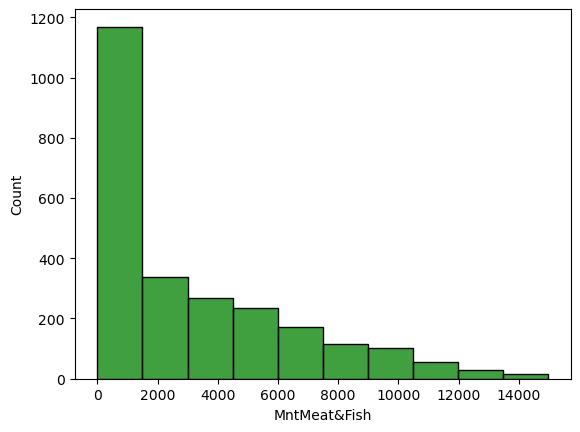

In [14]:
sns.histplot(data = df, x = 'MntMeat&Fish', color="g", bins = 10)

<AxesSubplot:xlabel='Income', ylabel='MntMeat&Fish'>

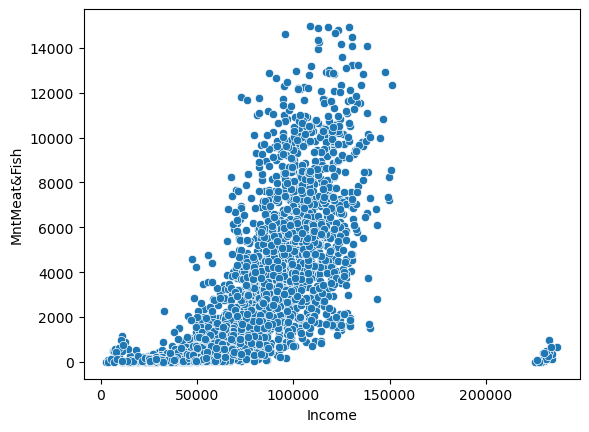

In [15]:
sns.scatterplot(data = df, x = 'Income', y= 'MntMeat&Fish')

<AxesSubplot:xlabel='Income', ylabel='MntVegan&Vegetarian'>

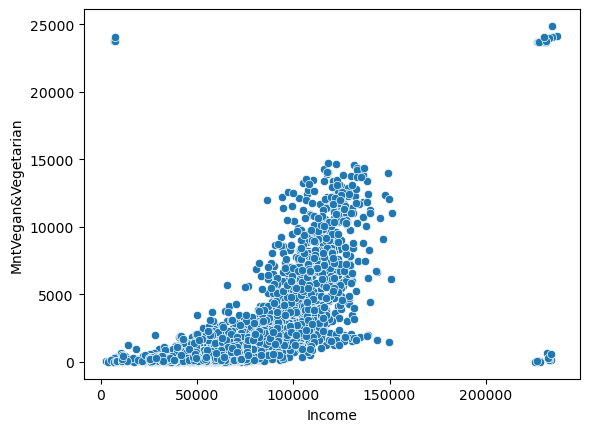

In [16]:
sns.scatterplot(data = df, x = 'Income', y= 'MntVegan&Vegetarian')

<AxesSubplot:xlabel='MntVegan&Vegetarian'>

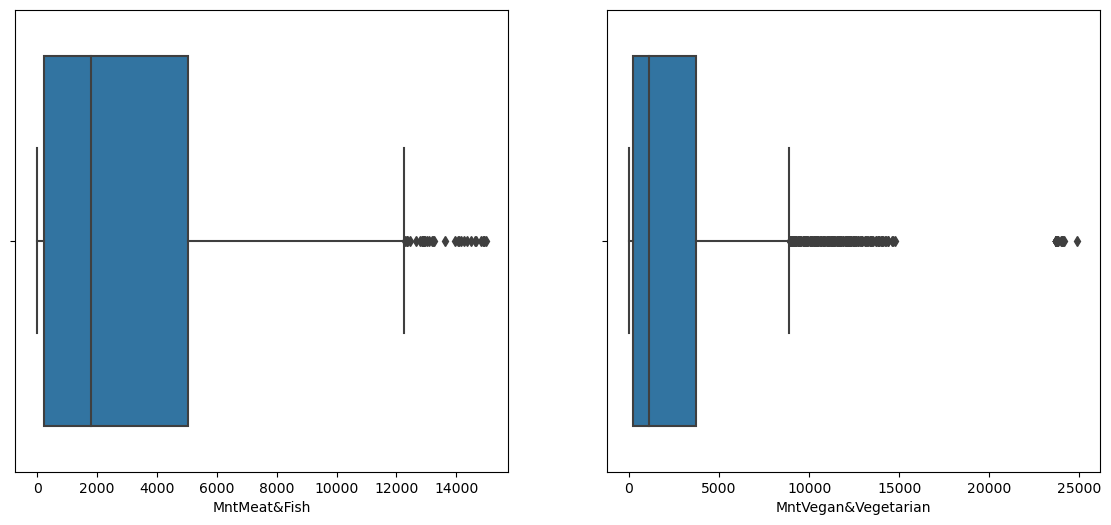

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'MntMeat&Fish')
sns.boxplot(ax = ax2, data = df, x = 'MntVegan&Vegetarian')

<AxesSubplot:xlabel='MntEntries'>

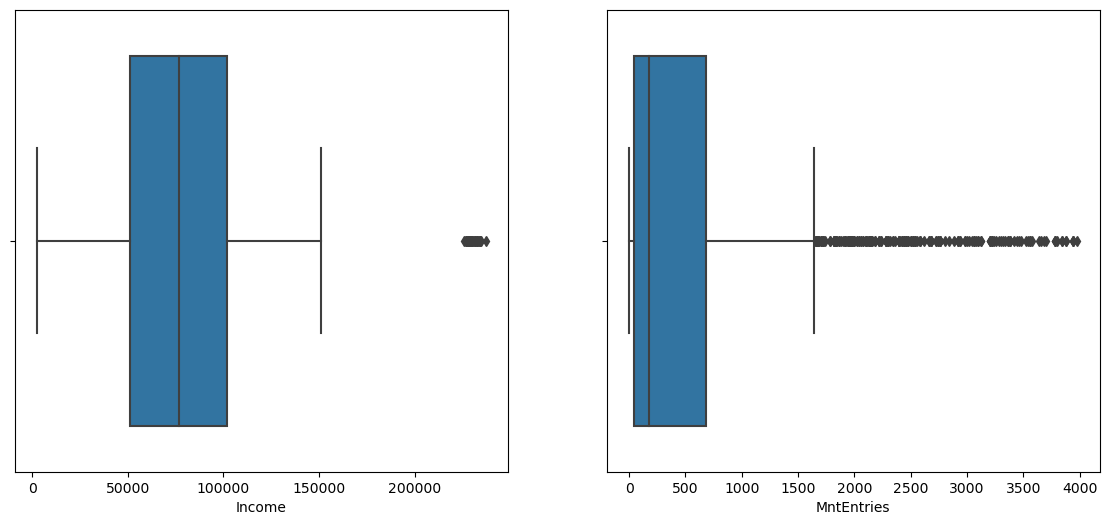

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'Income')
sns.boxplot(ax = ax2, data = df, x = 'MntEntries')

<AxesSubplot:xlabel='MntDesserts'>

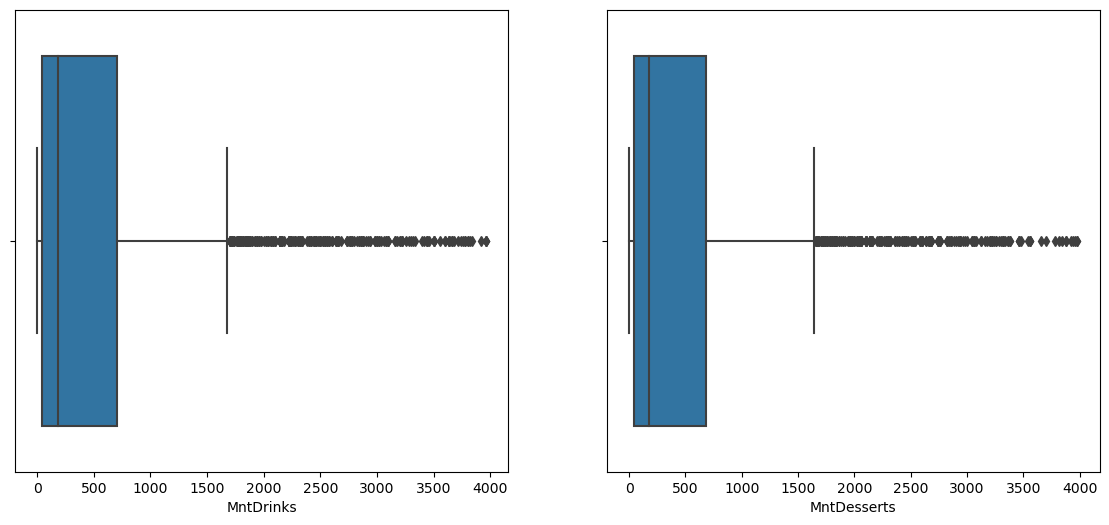

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'MntDrinks')
sns.boxplot(ax = ax2, data = df, x = 'MntDesserts')

<AxesSubplot:xlabel='NumOfferPurchases'>

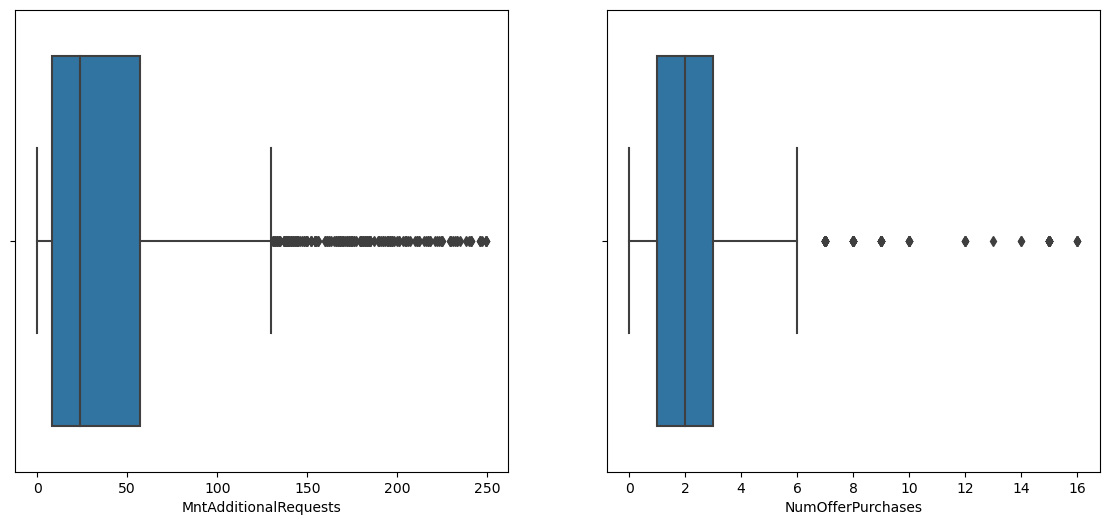

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'MntAdditionalRequests')
sns.boxplot(ax = ax2, data = df, x = 'NumOfferPurchases')

<AxesSubplot:xlabel='NumTakeAwayPurchases'>

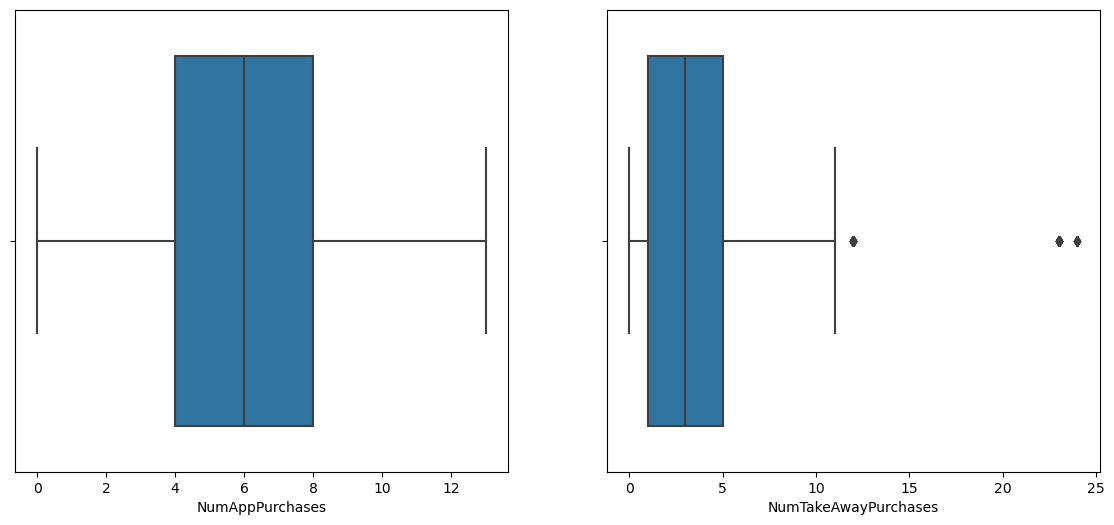

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'NumAppPurchases')
sns.boxplot(ax = ax2, data = df, x = 'NumTakeAwayPurchases')

<AxesSubplot:xlabel='NumAppVisitsMonth'>

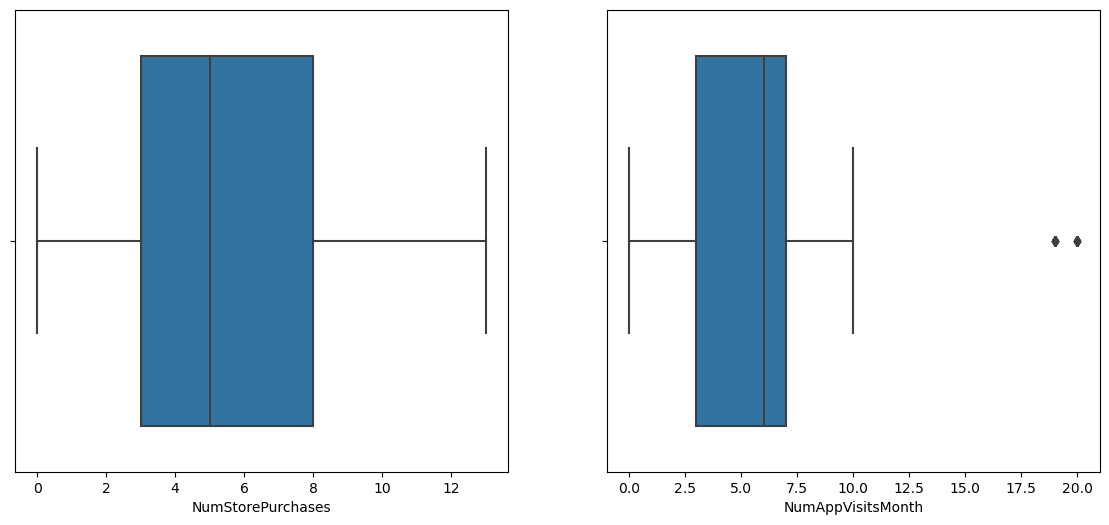

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'NumStorePurchases')
sns.boxplot(ax = ax2, data = df, x = 'NumAppVisitsMonth')

<AxesSubplot:>

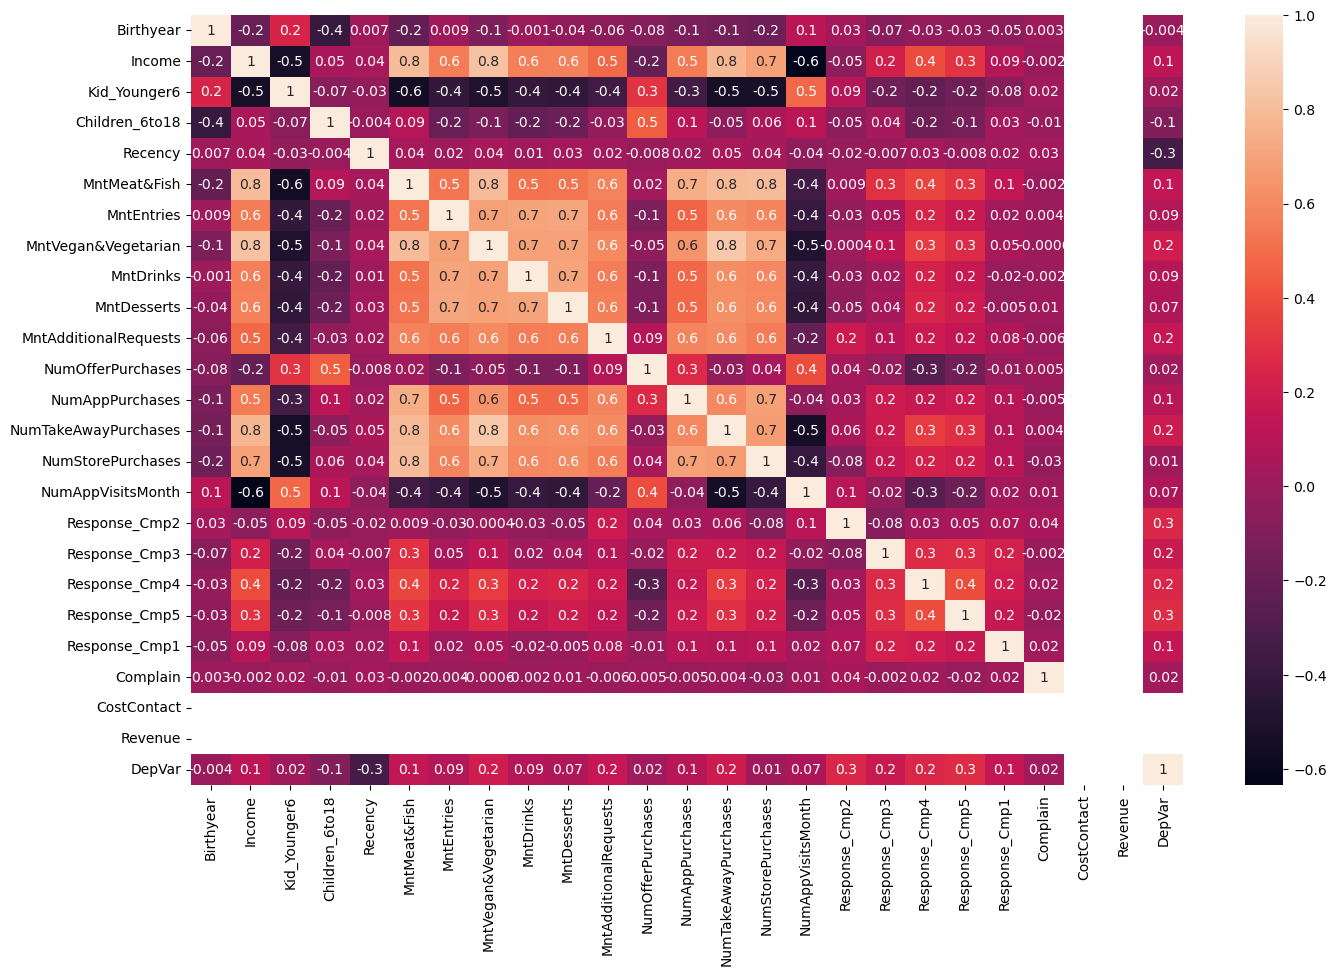

In [23]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

# Missing Values

In [24]:
df.isna().sum()

Name                      0
Birthyear                 0
Education                32
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  48
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                21
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Response_Cmp1             0
Complain                  0
CostContact               0
Revenue                   0
DepVar                    0
dtype: int64

- Education with mode
- Recency with Median
- MntDrinks with KNNImputer

In [25]:
df.fillna({
    'Education': df['Education'].mode()[0],
    'Recency':df['Recency'].median()
    }, inplace = True)

In [26]:
df_monetary = df[['MntDrinks','MntEntries','MntVegan&Vegetarian','MntDesserts']]

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(df_monetary) # this is an array
df_monetary = pd.DataFrame(array_impute, columns = df_monetary.columns)
df_monetary

,MntDrinks,MntEntries,MntVegan&Vegetarian,MntDesserts
0,60.0,0.0,60.0,140.0
1,0.0,0.0,60.0,0.0
2,380.0,380.0,2730.0,380.0
3,1560.0,420.0,3090.0,1840.0
4,40.0,20.0,150.0,40.0
...,...,...,...,...
2495,2380.0,1680.0,2220.0,1960.0
2496,200.0,0.0,3480.0,400.0
2497,20.0,60.0,315.0,20.0
2498,20.0,60.0,690.0,20.0


In [27]:
df['MntDrinks'] = df_monetary['MntDrinks'].values
df.isna().sum()

Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
Response_Cmp1            0
Complain                 0
CostContact              0
Revenue                  0
DepVar                   0
dtype: int64

## Misclassifications

In [28]:
df['Marital_Status'].value_counts()

Married     1009
Together     592
Single       533
Divorced     212
Widow         82
married       37
single        15
together       9
divorced       6
widow          5
Name: Marital_Status, dtype: int64

In [29]:
df['Marital_Status'] = df['Marital_Status'].str.capitalize() 
df['Marital_Status'].value_counts()

Married     1046
Together     601
Single       548
Divorced     218
Widow         87
Name: Marital_Status, dtype: int64

# Reclassification

In [30]:
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'].value_counts()

Married     1647
Single       548
Divorced     218
Widow         87
Name: Marital_Status, dtype: int64

__Juntar widow e divorced com single?__

In [31]:
df['Education'].value_counts()

Graduation    1283
PhD            522
Master         404
HighSchool     225
Basic           66
Name: Education, dtype: int64

In [32]:
df['Higher_Educ'] = np.where((df['Education']=='Graduation')|
                               (df['Education']=='Master')|
                               (df['Education']=='PhD'),1,0)

In [33]:
df["Gender"] = df["Name"].copy()

In [34]:
gender = df['Gender'].str.startswith('Mrs.') + df['Gender'].str.startswith('Miss')
df.loc[gender,'Gender'] = "Female"
df["Gender"]

CustomerID
30651    Mr. Trevor Ferguson
6222          Mr. Peter Gray
3909                  Female
20121                 Female
19896                 Female
                ...         
13344    Mr. Justin Metcalfe
28152       Mr. Brandon Nash
31938        Mr. Simon Mills
20016      Mr. Brandon Poole
15492                 Female
Name: Gender, Length: 2500, dtype: object

In [35]:
gender = df['Gender'].str.startswith('Mr.')
df.loc[gender,'Gender'] = "Male"
df["Gender"]

CustomerID
30651      Male
6222       Male
3909     Female
20121    Female
19896    Female
          ...  
13344      Male
28152      Male
31938      Male
20016      Male
15492    Female
Name: Gender, Length: 2500, dtype: object

In [36]:
df.drop('Name', axis = 1, inplace = True)
df.shape

(2500, 30)

## Outliers

- MntVegan&Vegetarian
- Income
- NumTakeAwayPurchases
-NumAppVisitsMonth